# MD004 ENTREGA5 ANOVA

### <font color='#3d59c6'> PARTE I </font>

Imagina que te llega un conjunto de datos que contiene tres variables categóricas>> A,B y C (con 2 categorías cada una). ¿Podrías plantear una estrategia que recoja los 3 factores realizando un Two-Way ANOVA? ¿y un One-Way ANOVA? ¿Qué consideraciones tendrías en cuenta al diseñar estos análisis? (2pt)

Para este caso, para plantear una estrategia que recoja todos lo factores para un two-way anova, realizaria tres distintos, uno para las categorias A y B, otro para A y C y otro para B y C. Esto, lo haria para determinar el impacto que tienen estas variables categoricas para explicar la variable dependiente. Sin embargo, si lo que buscamos es un ejemplo en el que podamos recojer las tres categorias en un solo Two-Way anova, trataria de explica una de las categorias mediante las otras dos para determinar si hay algún tipo de relacion entre la variables categoricas.

Con el one way anova, simplemente implementaria 3 distintos, uno por categoria para entender sus efectos individuales en la variable dependiente. Ya que no seria posible recojer las tres categorias en un solo One-Way Anova.

Las diferentes consideraciones que tendria en cuenta serian por ejemplo asegurarme de que la variable dependiente siga una distribución normal, ya que para que los resultados del ANOVA sean considerados como validos tiene que ser así. Tambien me aseguraria de que las 3 variables categoricas son independientes entre sí y tambien comprovaria que el último de los supuestos, la homocedasticidad, se cumple. Por último tambien tendria en cuenta el tamaño y la calidad de la muestra para determinar si el análisis es completamente representativo.


### <font color='#3d59c6'> PARTE II </font>

Se dispone del siguiente dataset que contiene en formato csv registros de diferentes deportistas y donde se recoge el valor de las siguientes variables teniendo como factores deporte y género:

- rcc: glóbulos rojos
- wcc: células blancas en la sangre
- hc: hematocritos(%)
- hg: concentración de hemoglobina, en gr por decalitro
- bmi: indice masa corporal
- sex: 2 categorías >> f m
- sport: 9 categorías >> B_Ball Netball Row Swim T_400m T_Sprnt Tennis W_Polo


###### Data: 
202401_ais.csv

(selección de >> origen:https://vincentarelbundock.github.io/Rdatasets/doc/DAAG/ais.html)

###### Se pide:

1. Visualización y comprensión del dataset (2p): Se pide visualizar y realizar estadísticos que ayuden a comprender mejor el dataset dentro del dominio de ANOVA: Análisis descriptivo de las variables continuas y de nuestros factores y análisis de correlaciones
2. Calcular la prueba ANOVA One-Way para la variable sport respecto 2 variables continuas (escoged). Interpretar resultados y acompañar con los gráficos vistos en clase (3p)
3. Calcular la prueba ANOVA Two-Way con ambos factores respecto 2 variables continuas (diferentes a las anteriores): comentad todo lo que observeis, ¿es sport significativa?¿y sex? ¿y conjuntamente? (3p)

;) Recuerda realizar un apartado de conclusiones que recoja las principales observaciones a lo largo del ejercicio

<br> 
<div>
<img src="attachment:image-3.png" width="500"/>
</div>


## <font color='#3d59c6'>  0. CARGA DE PACKAGES </font>

- **tidyverse:** esta librería nos será útil en todo el proceso del análisis descriptivo así como también, a la hora de manipular los datos. Engloba varias librerías como por ejemplo ggplot2 y dplyr (usados en la sesión anterior)
- **gridExtra:** con esta librería podremos organizar y personalizar nuestros gráficos, así como mapear varios gráficos en una única área
- **ggplot2**: la usamos para crear gráficos más personalizables o dico de otra maenra, podremos crear visualizaciones complejas.
- **GGally**: es una extensión de ggplot2 con funciones adicionales para crear matrices de gráficos, lo que facilita la exploración de relaciones entre múltiples variables.

In [3]:
library(tidyverse)
library(ggplot2)
install.packages('GGally', dependencies=TRUE, repos="https://CRAN.R-project.org/")
library(GGally)
library(gridExtra)

also installing the dependencies ‘DEoptimR’, ‘checkmate’, ‘coda’, ‘pcaPP’, ‘robustbase’, ‘som’, ‘lars’, ‘pls’, ‘mclust’, ‘sp’, ‘tweenr’, ‘polyclip’, ‘cluster’, ‘foreign’, ‘htmlTable’, ‘viridis’, ‘Formula’, ‘cpp11’, ‘statnet.common’, ‘rJava’, ‘lazyeval’, ‘hunspell’, ‘estimability’, ‘mvtnorm’, ‘ggstats’, ‘broom.helpers’, ‘chemometrics’, ‘geosphere’, ‘ggforce’, ‘Hmisc’, ‘igraph’, ‘intergraph’, ‘labelled’, ‘maps’, ‘mapproj’, ‘network’, ‘scagnostics’, ‘sna’, ‘crosstalk’, ‘spelling’, ‘emmeans’, ‘vdiffr’


Warning message in install.packages("GGally", dependencies = TRUE, repos = "https://CRAN.R-project.org/"):
“installation of package ‘rJava’ had non-zero exit status”
Warning message in install.packages("GGally", dependencies = TRUE, repos = "https://CRAN.R-project.org/"):
“installation of package ‘scagnostics’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggpl

## <font color='#3d59c6'>  1. CARGA DE DATOS </font>

In [8]:
data <- read.csv(file='202401_ais.csv', header=TRUE, sep=';', dec='.')
str(data)

'data.frame':	124 obs. of  8 variables:
 $ rownames: int  1 2 3 4 5 6 7 8 9 10 ...
 $ rcc     : num  3.96 4.41 4.14 4.11 4.45 4.1 4.31 4.42 4.3 4.51 ...
 $ wcc     : num  7.5 8.3 5 5.3 6.8 4.4 5.3 5.7 8.9 4.4 ...
 $ hc      : num  37.5 38.2 36.4 37.3 41.5 37.4 39.6 39.9 41.1 41.6 ...
 $ hg      : num  12.3 12.7 11.6 12.6 14 12.5 12.8 13.2 13.5 12.7 ...
 $ bmi     : num  20.6 20.7 21.9 21.9 19 ...
 $ sex     : chr  "f" "f" "f" "f" ...
 $ sport   : chr  "B_Ball" "B_Ball" "B_Ball" "B_Ball" ...


El dataset para este caso práctico consta de 124 observaciones con un total de 8 variables, siendo 2 de ellas factores (categóricas) y una de identificador.

### Variables numericas

In [23]:
data_num = data %>%
  select_if(is.numeric)
data_num = data_num[, c('rcc', 'wcc', 'hc', 'hg', 'bmi')]
head(data_num)

rcc  wcc hc   hg   bmi  
1 3.96 7.5 37.5 12.3 20.56
2 4.41 8.3 38.2 12.7 20.67
3 4.14 5.0 36.4 11.6 21.86
4 4.11 5.3 37.3 12.6 21.88
5 4.45 6.8 41.5 14.0 18.96
6 4.10 4.4 37.4 12.5 21.04

In [27]:
summary(data_num)

      rcc             wcc               hc              hg       
 Min.   :3.900   Min.   : 3.300   Min.   :36.40   Min.   :11.60  
 1st Qu.:4.360   1st Qu.: 5.800   1st Qu.:40.98   1st Qu.:13.78  
 Median :4.695   Median : 6.600   Median :43.15   Median :14.60  
 Mean   :4.676   Mean   : 6.613   Mean   :43.00   Mean   :14.52  
 3rd Qu.:5.005   3rd Qu.: 7.500   3rd Qu.:45.23   3rd Qu.:15.40  
 Max.   :5.660   Max.   :10.100   Max.   :50.20   Max.   :17.70  
      bmi       
 Min.   :16.75  
 1st Qu.:20.80  
 Median :22.33  
 Mean   :22.29  
 3rd Qu.:23.73  
 Max.   :26.79  

En este resumen de nuestras variables podemos observar como la media de las variables es muy cercana a su mediana y los quartiles estan distribuidos bastante equitativamente lo que nos indica una baja dispersión y tambien nos deja intuir que podrían tratarse de variables que siguen una distribución normal. También podemos apreciar como los valores parecen bastante limpios, es decir no tenemos ni mínimos ni máximos exagerados que podrían ser considerados outliers o incluso errores.

In [28]:
data_num %>% 
    summarize(m_FL = mean(rcc), sd_FL = sd(rcc) #calculating the mean and standard deviation for each metric
             , m_RW = mean(wcc), sd_RW = sd(wcc)
             , m_CL = mean(hc), sd_CL = sd(hc)
             , m_CW = mean(hg), sd_CW = sd(hg)
             , m_BD = mean(bmi), sd_BD = sd(bmi))

m_FL     sd_FL     m_RW     sd_RW    m_CL     sd_CL   m_CW     sd_CW   
1 4.675726 0.4095728 6.612903 1.385697 42.99597 3.06253 14.51532 1.201019
  m_BD     sd_BD   
1 22.29234 2.108925

Aqui podemos apreciar como las desviaciones de las variables son bastante bajas a juzgar por su media correspondiente.

In [35]:
data_summary = data %>%
  group_by(sport) %>%
      summarize(
        m_rcc = mean(rcc), sd_rcc = sd(rcc),
        m_wcc = mean(wcc), sd_wcc = sd(wcc),
        m_hc = mean(hc), sd_hc = sd(hc),
        m_hg = mean(hg), sd_hg = sd(hg),
        m_bmi = mean(bmi), sd_bmi = sd(bmi))

data_summary

sport  m_rcc    sd_rcc    m_wcc    sd_wcc   m_hc     sd_hc    m_hg    
1 B_Ball 4.570000 0.3609478 6.800000 1.413919 41.87600 3.195737 14.09600
2 Row    4.677838 0.3849541 6.891892 1.455140 43.08108 2.753365 14.58108
3 Swim   4.714545 0.4316825 6.131818 1.309811 43.62273 3.146114 14.71364
4 T_400m 4.691034 0.4208609 6.468966 1.253311 43.58621 2.828897 14.72414
5 Tennis 4.790909 0.5322867 6.590909 1.500303 42.44545 3.872561 14.30000
  sd_hg     m_bmi    sd_bmi  
1 1.3513820 22.25840 1.902605
2 0.9851221 23.49811 1.805365
3 1.1527588 22.93864 1.855074
4 1.1694489 20.74310 1.485766
5 1.5893395 21.10545 2.462679

En esta tabla se puede apreciar como la variable sport no genera un cambio importante ni en las medias ni en las desviaciones de las variables en su mayoria, a excepción del índice de masa corporal en el que si podemos apreciar un poco de canvio en las medias.

In [34]:
data_summary = data %>%
  group_by(sex) %>%
      summarize(
        m_rcc = mean(rcc), sd_rcc = sd(rcc),
        m_wcc = mean(wcc), sd_wcc = sd(wcc),
        m_hc = mean(hc), sd_hc = sd(hc),
        m_hg = mean(hg), sd_hg = sd(hg),
        m_bmi = mean(bmi), sd_bmi = sd(bmi))

diff_row = data_summary %>%
  summarise(sex = "diff_sex",
        m_rcc = diff(m_rcc),sd_rcc = diff(sd_rcc),
        m_wcc = diff(m_wcc),sd_wcc = diff(sd_wcc),
        m_hc = diff(m_hc),sd_hc = diff(sd_hc),
        m_hg = diff(m_hg),sd_hg = diff(sd_hg),
        m_bmi = diff(m_bmi),sd_bmi = diff(sd_bmi))

data_summary = bind_rows(data_summary, diff_row)
data_summary

sex      m_rcc     sd_rcc     m_wcc     sd_wcc     m_hc     sd_hc     
1 f        4.4040323 0.30030836 6.5403226 1.35809168 40.92097  2.3966600
2 m        4.9474194 0.31306489 6.6854839 1.42009545 45.07097  2.1013179
3 diff_sex 0.5433871 0.01275652 0.1451613 0.06200377  4.15000 -0.2953422
  m_hg      sd_hg       m_bmi     sd_bmi    
1 13.672581  0.89078513 21.589516  2.0627480
2 15.358065  0.81934568 22.995161  1.9258754
3  1.685484 -0.07143945  1.405645 -0.1368726

Aqui podemos apreciar como en general la variable sexo si que es significativa en cuanto a las medias de las variables pero tambien podemos apreciar algo muy interesante, y es que las desviaciones son muy parecidas entre género por lo que seguramente ambos generos sigan una distribucion parecida con las medias en diferentes puntos.

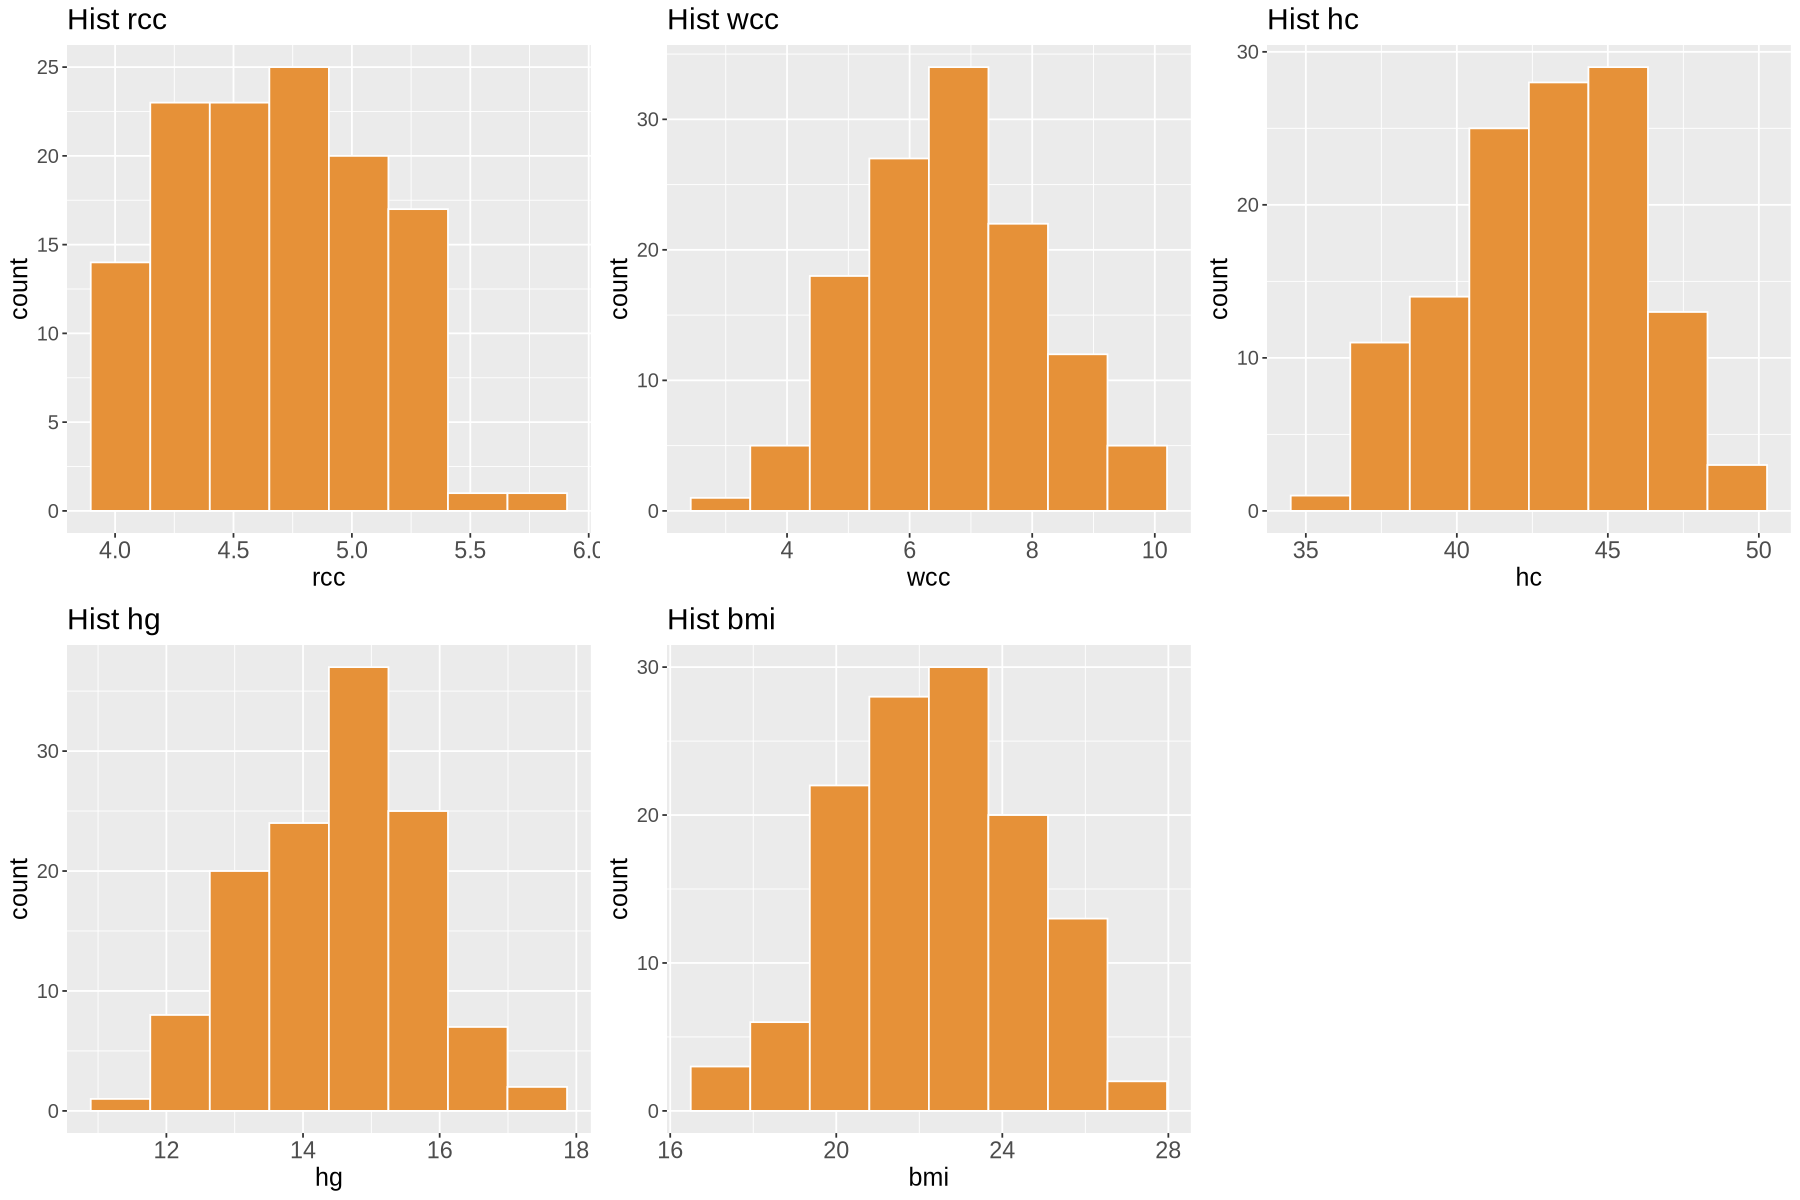

In [41]:
graficos_histograma = list()
var_data = colnames(data_num)

for (variable in var_data) {

  grafico = ggplot(data_num) +
    aes_string(x = variable) +
    geom_histogram(bins = 8, fill = '#e69138', color = 'white', na.rm = TRUE) +
    theme(text = element_text(size = 15), axis.text.x = element_text(size = 14)) + 
    labs(title = paste('Hist', variable))
  

  graficos_histograma[[length(graficos_histograma) + 1]] = grafico
}

options(
  repr.plot.width = 15,  
  repr.plot.height = 10  
)

# Mostrar los histogramas en un grid
do.call('grid.arrange', c(graficos_histograma, ncol = 3))

Gracias a estos histogramas podemos ver como todas las variables siguen algo que podria llegar a considerarse una normal, sobretodo con el indice de mas corporal, la concentración de hemoglobina y las células blancas en la sangre. Más tarde realizaré un qqplot para arrojar un poco más de luz en este tema.

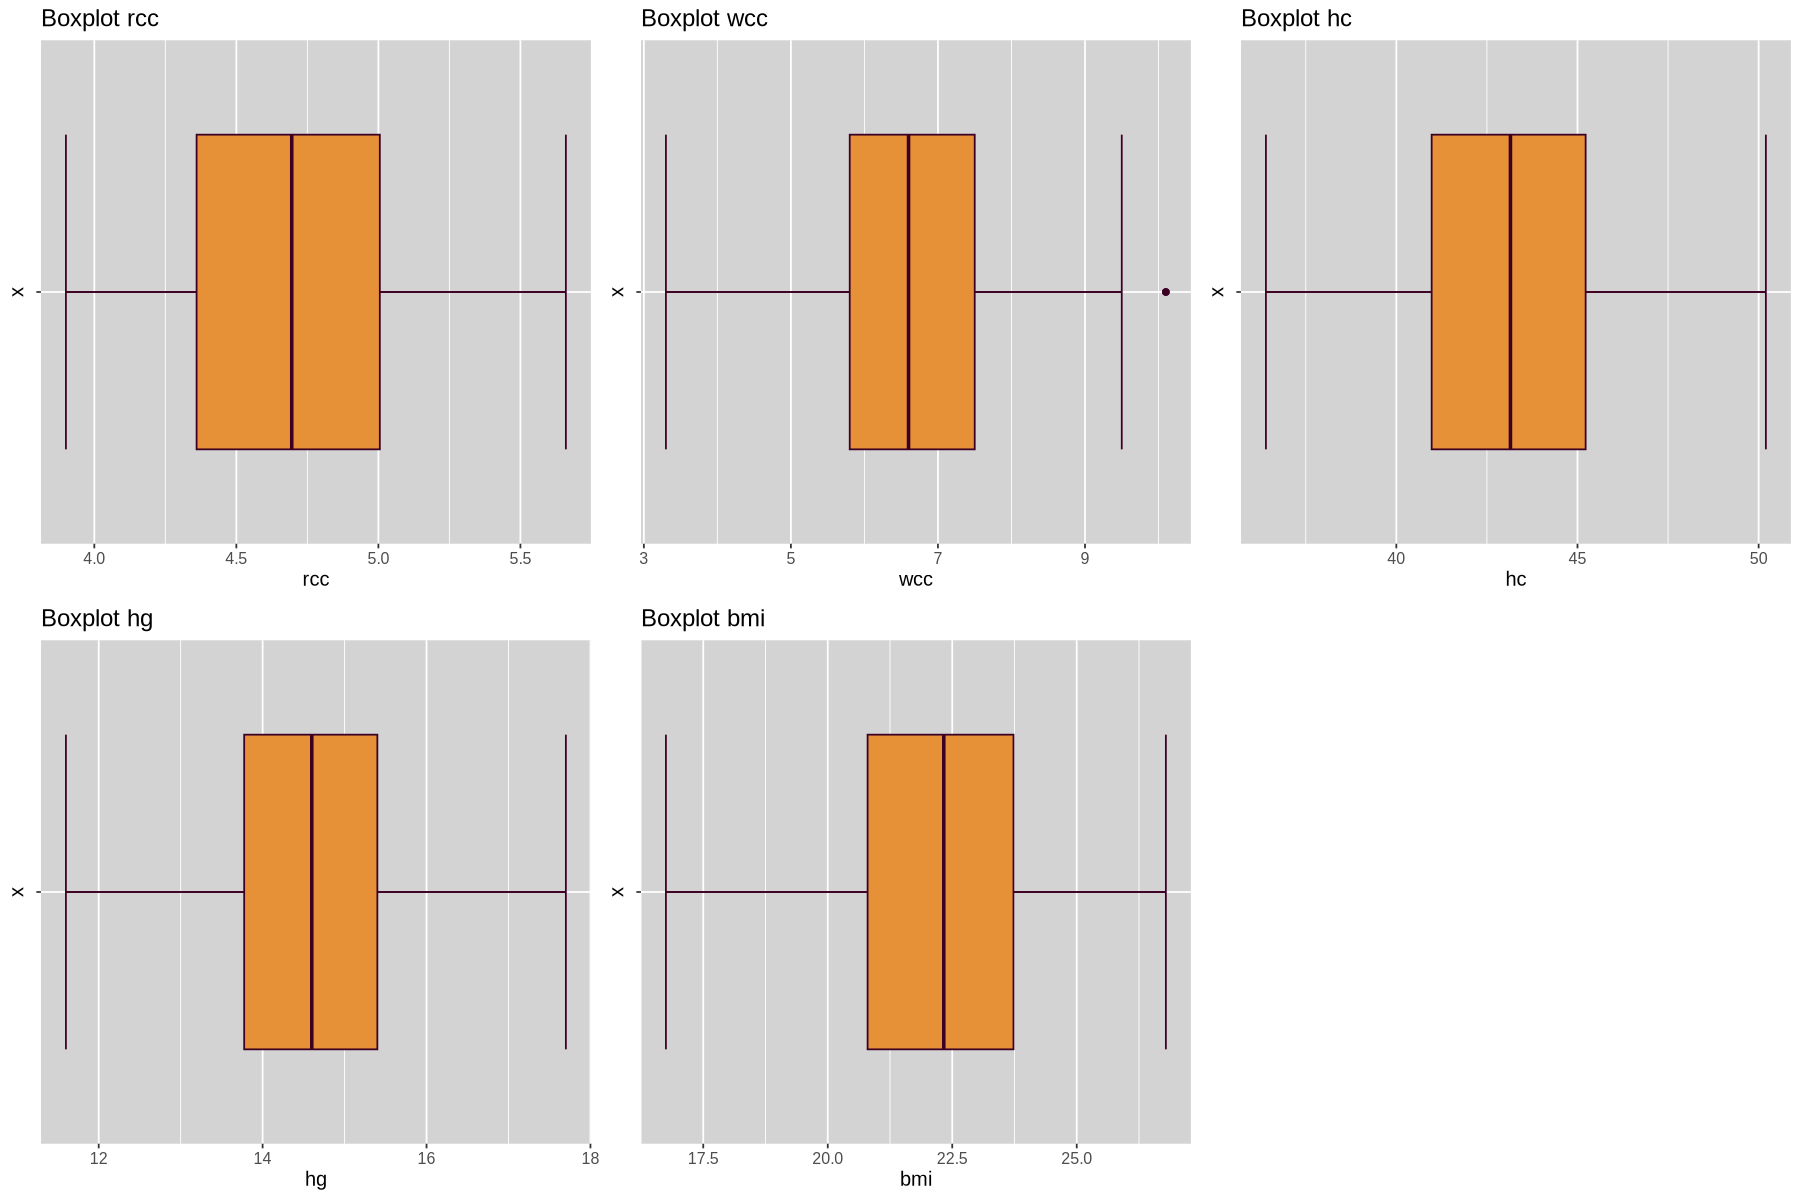

In [42]:
box_plots = list()
var_data = colnames(data_num)

for (variable in var_data) {
  box_plot = ggplot(data_num, aes(x = '', y = !!sym(variable))) +
    stat_boxplot(geom = 'errorbar', color = '#3c0023', na.rm = TRUE) +
    geom_boxplot(fill = '#e69138', color = '#3c0023', na.rm = TRUE) +
    coord_flip() +
    labs(title = paste('Boxplot', variable), y = variable) +
    theme(panel.background = element_rect(fill = 'lightgray'),
        panel.grid.major = element_line(color = 'white'),
        panel.grid.minor = element_line(color = 'white')) +
    theme(text = element_text(size = 12))
  box_plots[[variable]] = box_plot
}

options(
  repr.plot.width = 15,  
  repr.plot.height = 10 
)
grid.arrange(grobs = box_plots, ncol = 3, widths = rep(2, 3))

Pocos o ningún outlier y distribuciones con colas muy parecidas y equitativas

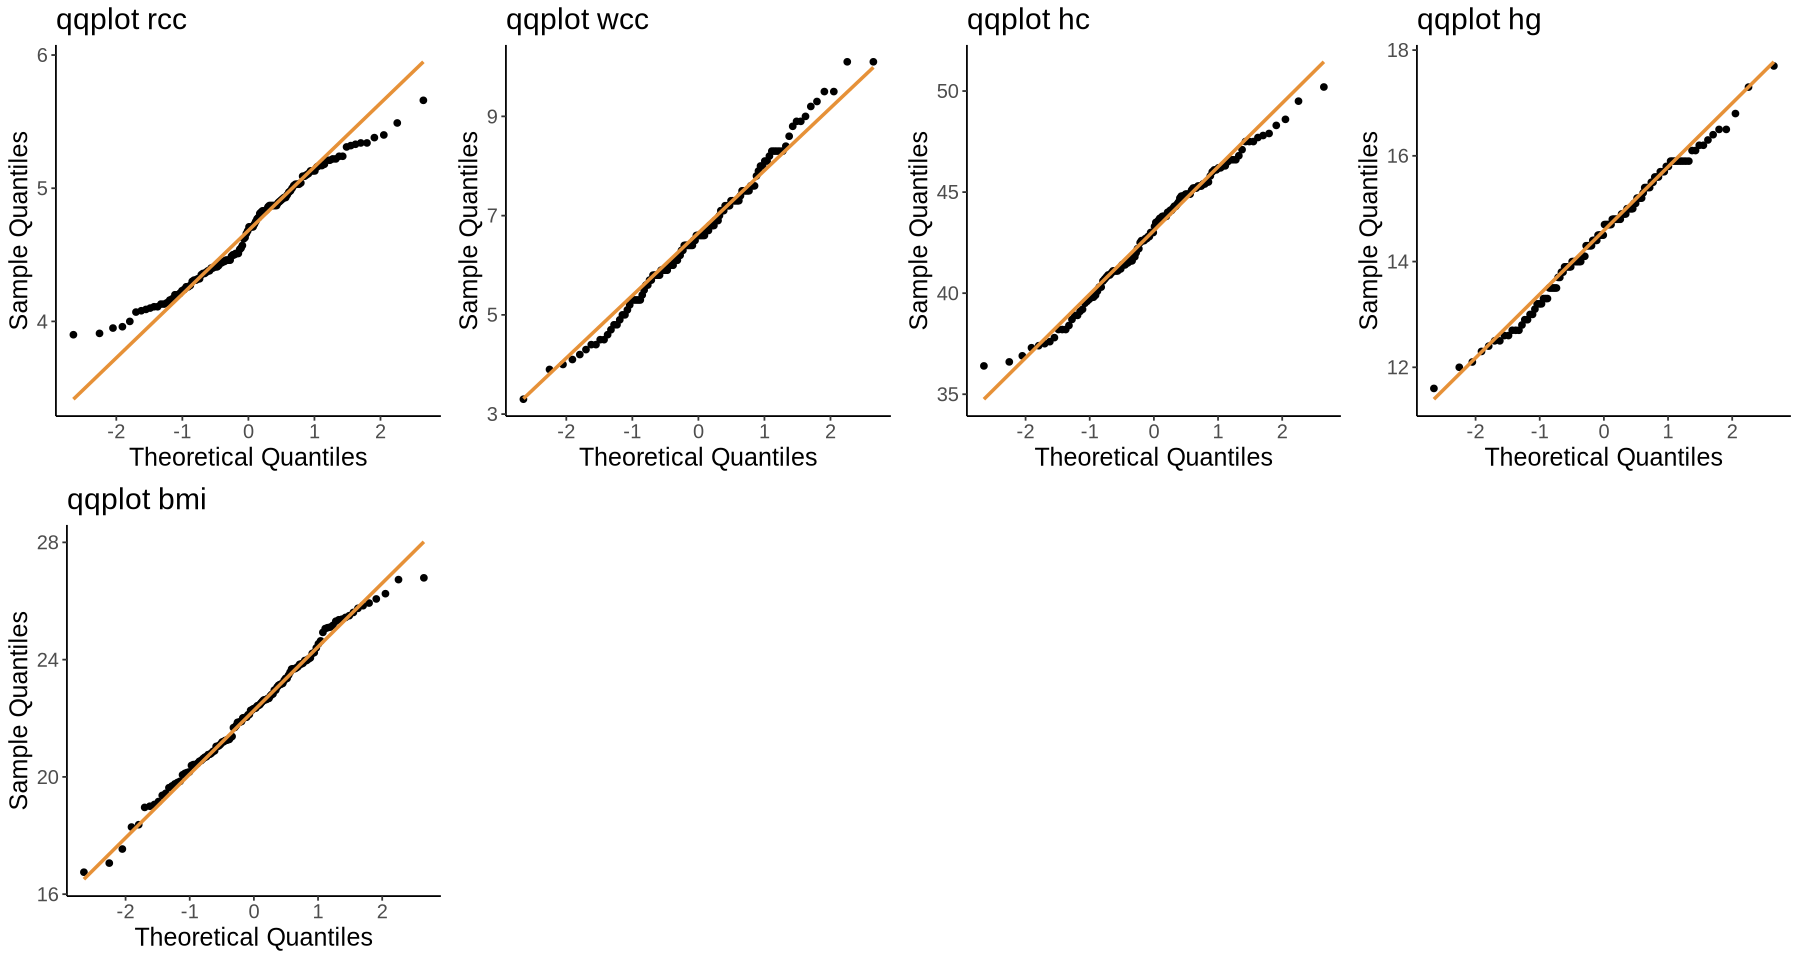

In [50]:
options(
  repr.plot.width = 15,  
  repr.plot.height = 8  
)
qq_plots = list()
var_data = colnames(data_num)

for (i in seq_along(var_data)) {
  variable = var_data[i]
  qq_plot = ggplot(data_num[!is.na(data_num[[variable]]), ],aes(sample = !!sym(variable))) +
    stat_qq() +
    stat_qq_line(color ='#e69138', lwd = 1) +
    labs(title = paste('qqplot', variable),
         x = 'Theoretical Quantiles',
         y = 'Sample Quantiles') +
    theme_classic() +
    theme(text = element_text(size = 15))
  qq_plots[[i]] = qq_plot
}

grid.arrange(grobs = qq_plots, ncol = 4, widths = rep(2, 4))

Tal y como habia supuesto anteriormente, gracias a estos qqplots podemos ver como en efecto tanto el bmi como el hg siguen distribuciones que parecen normales y el wcc aunque parece irse un poco más, sigue pareciendose bastante a una normal.

### Variables categoricas

In [54]:
data_cat = data[, c('sex', 'sport')]
head(data_cat)

sex sport 
1 f   B_Ball
2 f   B_Ball
3 f   B_Ball
4 f   B_Ball
5 f   B_Ball
6 f   B_Ball

In [55]:
col_cat = c('sex','sport')
null_counts = colSums(is.na(data_cat[, col_cat]))
print(data.frame(Nulos = null_counts))

      Nulos
sex       0
sport     0


Aqui se puede apreciar como disponemos de 2 variables categoricas y que no tienen ningún valor nulo.

In [59]:
table(data_cat$sex,data_cat$sport)

   
    B_Ball Row Swim T_400m Tennis
  f     13  22    9     11      7
  m     12  15   13     18      4

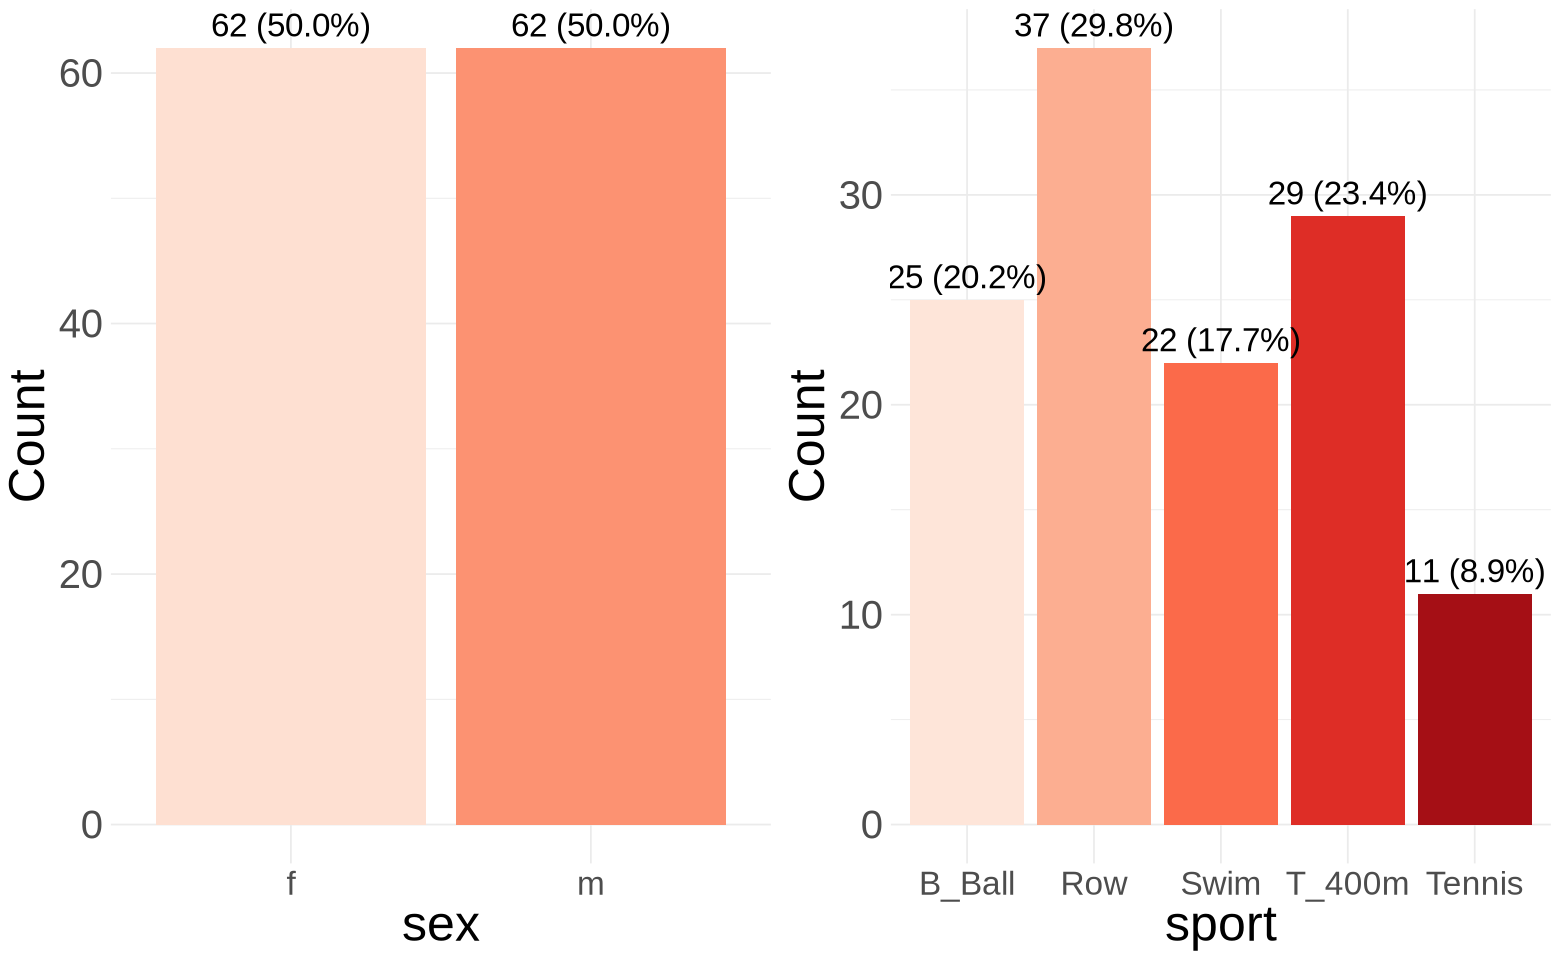

In [60]:
options(
  repr.plot.width = 13,  
  repr.plot.height = 8 
)
bar_plots = list()
var_data_cat_list = data_cat[col_cat]
var_data_cat = lapply(var_data_cat_list, list)

for (variable in names(var_data_cat)) {
  bar_plot = ggplot(data_cat, aes(x = !!sym(variable), fill = as.factor(!!sym(variable)))) +
    geom_bar(stat = 'count', position = 'dodge') +
    scale_fill_brewer(palette = 'Reds') + 
    labs( x = variable, y = 'Count') +
    theme_minimal() +
    theme(legend.position = 'none', text = element_text(size = 30),axis.text.x = element_text(size = 20)) +
    geom_text(
      stat = 'count',
      aes(label = sprintf('%d (%.1f%%)', after_stat(count), after_stat(count) / sum(after_stat(count)) * 100)),
      position = position_dodge(0.9),
    vjust = -0.5,
    size=7
    )
  
  bar_plots[[variable]] = bar_plot
}

grid.arrange(grobs = bar_plots, ncol = 2, widths = rep(1, 2))

Gracias a este gráfico se pueden observar las distintas categorias dentro de cada una de estas variables y como estan distribuidas, tal y como vemos en la primera, tenemos exactamente el mismo número de personas del sexo femenino y masculino y en el segundo grafico podemos observar como la categoria tennis tiene considerablemente menos muestras que el resto.

### Covarianzas

In [61]:
round(cov(data_num), 3)

rcc   wcc   hc    hg    bmi  
rcc 0.168 0.101 1.143 0.429 0.173
wcc 0.101 1.920 0.835 0.281 0.256
hc  1.143 0.835 9.379 3.519 1.401
hg  0.429 0.281 3.519 1.442 0.618
bmi 0.173 0.256 1.401 0.618 4.448

In [62]:
round(cor(data_num), 3)

rcc   wcc   hc    hg    bmi  
rcc 1.000 0.178 0.912 0.871 0.201
wcc 0.178 1.000 0.197 0.169 0.087
hc  0.912 0.197 1.000 0.957 0.217
hg  0.871 0.169 0.957 1.000 0.244
bmi 0.201 0.087 0.217 0.244 1.000

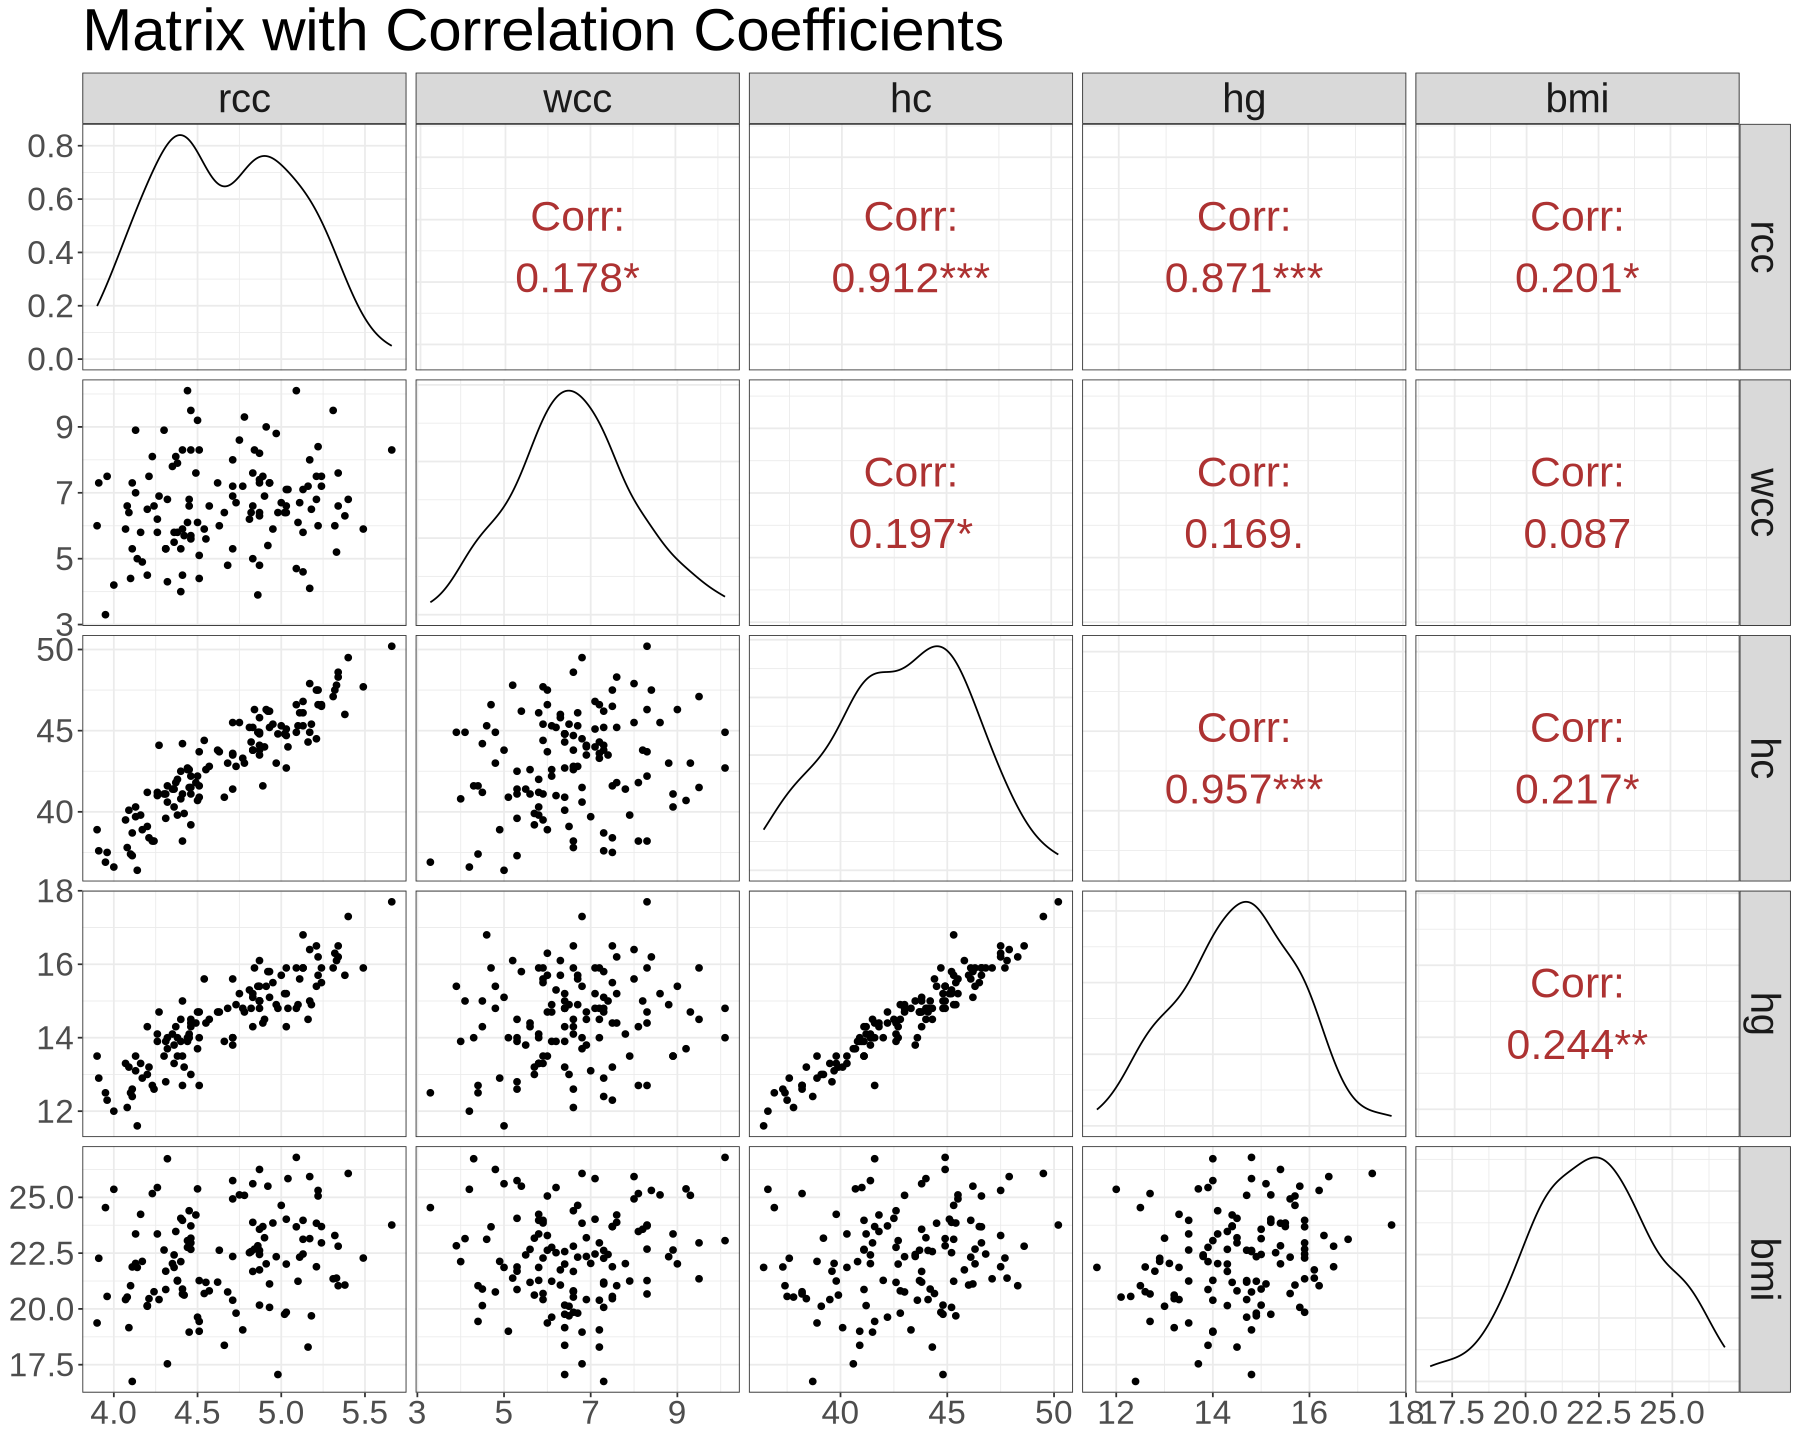

In [63]:
options(
  repr.plot.width = 15,  
  repr.plot.height = 12  
)
ggpairs(
  data_num,
  title = "Matrix with Correlation Coefficients",
  upper = list(continuous = wrap("cor", size = 9, color ='#ad3232'))) +
theme_bw() +
theme(
  text = element_text(size = 30), 
  axis.text = element_text(size = 20),
  axis.title = element_text(size = 25)
)

En este analisi de correlaciones apreciamos como nuestra variable de globulos rojos esta altamente correlacionada con todo el resto de variables a excepcion de la variable wcc que indica el la cantidad de células blancas en la sangre y el indice de masa corporal, la cual se distancia de todo el resto de variables y no muestra una correlacion con ninguna de las otras variables continuas. Ademas de esto, observamos como la mayor correlacion se encuentra entre las variables del porcentage de hematocritos (hc) y la  concentración de hemoglobin (hg).o

### ANOVA One-Way

Se hara sobre las variables hg y bmi ya que son las dos variables que aparentan una mayor normalidad en sus distribuciones

### Comprovacion de supuestos

#### Normalidad

In [66]:
variables = colnames(data_num)
categorias = c( 'B_Ball', 'Row', 'Swim', 'T_400m', 'Tennis')
resultados <- data.frame(Variable = character(), Cat = character(), Shapiro = numeric(), PValor = numeric(), row.names = NULL)

for (variable in variables) {
  for (cat in categorias) {
    data_subset = subset(data, sport == cat)
    result = shapiro.test(data_subset[, variable])
    resultados = rbind(resultados, data.frame(Variable = variable, Cat = cat, Shapiro = result$statistic, PValor = round(result$p.value, 3)))
  }
}

print(resultados)

    Variable    Cat   Shapiro PValor
W        rcc B_Ball 0.9668856  0.568
W1       rcc    Row 0.9659142  0.309
W2       rcc   Swim 0.9164542  0.064
W3       rcc T_400m 0.9755527  0.717
W4       rcc Tennis 0.9602871  0.775
W5       wcc B_Ball 0.9627397  0.472
W6       wcc    Row 0.9608115  0.214
W7       wcc   Swim 0.9621063  0.533
W8       wcc T_400m 0.9536983  0.228
W9       wcc Tennis 0.9146806  0.277
W10       hc B_Ball 0.9677765  0.589
W11       hc    Row 0.9884984  0.962
W12       hc   Swim 0.9381614  0.181
W13       hc T_400m 0.9613755  0.355
W14       hc Tennis 0.9783319  0.956
W15       hg B_Ball 0.9583881  0.383
W16       hg    Row 0.9782721  0.671
W17       hg   Swim 0.9457531  0.260
W18       hg T_400m 0.9780738  0.787
W19       hg Tennis 0.9399817  0.520
W20      bmi B_Ball 0.9694488  0.631
W21      bmi    Row 0.9622123  0.237
W22      bmi   Swim 0.9827718  0.954
W23      bmi T_400m 0.9578281  0.290
W24      bmi Tennis 0.9655063  0.838


In [97]:
variables = colnames(data_num)
categorias = c( 'f', 'm')
resultados <- data.frame(Variable = character(), Cat = character(), Shapiro = numeric(), PValor = numeric(), row.names = NULL)

for (variable in variables) {
  for (cat in categorias) {
    data_subset = subset(data, sex == cat)
    result = shapiro.test(data_subset[, variable])
    resultados = rbind(resultados, data.frame(Variable = variable, Cat = cat, Shapiro = result$statistic, PValor = round(result$p.value, 3)))
  }
}

print(resultados)

   Variable Cat   Shapiro PValor
W       rcc   f 0.9527609  0.018
W1      rcc   m 0.9796056  0.390
W2      wcc   f 0.9889641  0.852
W3      wcc   m 0.9871224  0.762
W4       hc   f 0.9822609  0.509
W5       hc   m 0.9917297  0.953
W6       hg   f 0.9853917  0.670
W7       hg   m 0.9881680  0.815
W8      bmi   f 0.9891767  0.862
W9      bmi   m 0.9737279  0.204


Observamos como la gran mayoria de casos siguen una distribución normal lo cual es música para nuestros oídos.

#### Homocedasticidad

In [67]:
resultados_bartlett = data.frame(Variable = character(), Estadistico = numeric(), PValor = numeric(), row.names = NULL)

for (variable in variables) {
  resultado_bartlett = bartlett.test(get(variable) ~ sex, data = data)
  resultados_bartlett = rbind(resultados_bartlett, data.frame(Variable = variable, Estadistico = resultado_bartlett$statistic, PValor = resultado_bartlett$p.value))
}

print(resultados_bartlett)

                      Variable Estadistico    PValor
Bartlett's K-squared       rcc   0.1046790 0.7462853
Bartlett's K-squared1      wcc   0.1205474 0.7284416
Bartlett's K-squared2       hc   1.0434306 0.3070249
Bartlett's K-squared3       hg   0.4223403 0.5157716
Bartlett's K-squared4      bmi   0.2849915 0.5934481


Como todos los p-valores son mayores a 0.05 no puedo rechazar la hipótesis nula, lo que sugiere que no hay evidencia suficiente para decir que las varianzas son diferentes asi que asumo que se cumple el supuesto de homocedasticidad.

### ANOVA

Para el test anova he escogido las variables de indice de masa corporal (bmi) y de concentración de hemoglobina (hg). Ya que eran dos variables que presentaban una fuerte normalidad y no parecian estar altamente correlacionadas entre ellas.

ERROR: Error in legend(x = "topright", fill = c("#3d85c6", "#e69138")): argument "legend" is missing, with no default


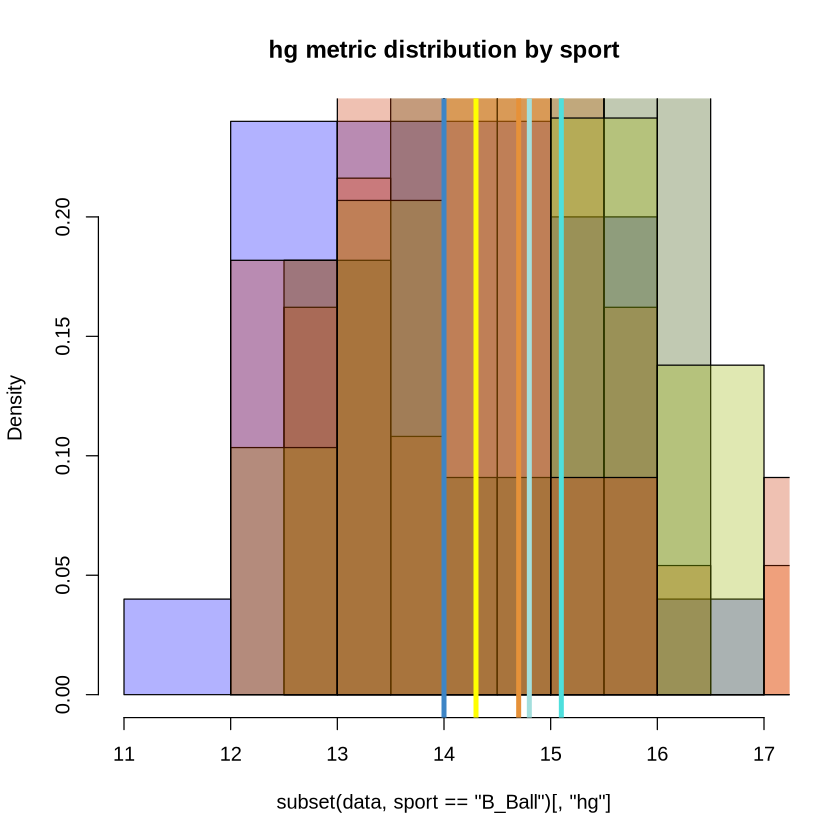

In [99]:
options(
  repr.plot.width = 7,  
  repr.plot.height = 7  
)

hist(subset(data,sport=='B_Ball')[,'hg'],
    col = rgb(0,0,1,0.3),
    main = 'hg metric distribution by sport',
    freq = F)
hist(subset(data,sport=='Row')[,'hg'],
    col = rgb(1,0.4,0,0.3),
    add = T,
    freq = F)
hist(subset(data,sport=='Swim')[,'hg'],
    col = rgb(0.2,0.3,0,0.3),
    add = T,
    freq = F)
hist(subset(data,sport=='T_400m')[,'hg'],
    col = rgb(0.6,0.7,0,0.3),
    add = T,
    freq = F)
hist(subset(data,sport=='Tennis')[,'hg'],
    col = rgb(0.8,0.2,0,0.3),
    add = T,
    freq = F)

abline(v = median(subset(data, sport=='B_Ball')[,'hg']), col = '#3d85c6', lwd = 4)
abline(v = median(subset(data, sport=='Row')[,'hg']), col = '#e69138', lwd = 4)
abline(v = median(subset(data, sport=='Swim')[,'hg']), col = '#4edfdd', lwd = 4)
abline(v = median(subset(data, sport=='T_400m')[,'hg']), col = '#a3dfdd', lwd = 4)
abline(v = median(subset(data, sport=='Tennis')[,'hg']), col = '#FFFF00', lwd = 4)

legend(x = "topright", fill = c('#3d85c6', '#e69138'))

ERROR: Error in legend(x = "topright", fill = c("#3d85c6", "#e69138")): argument "legend" is missing, with no default


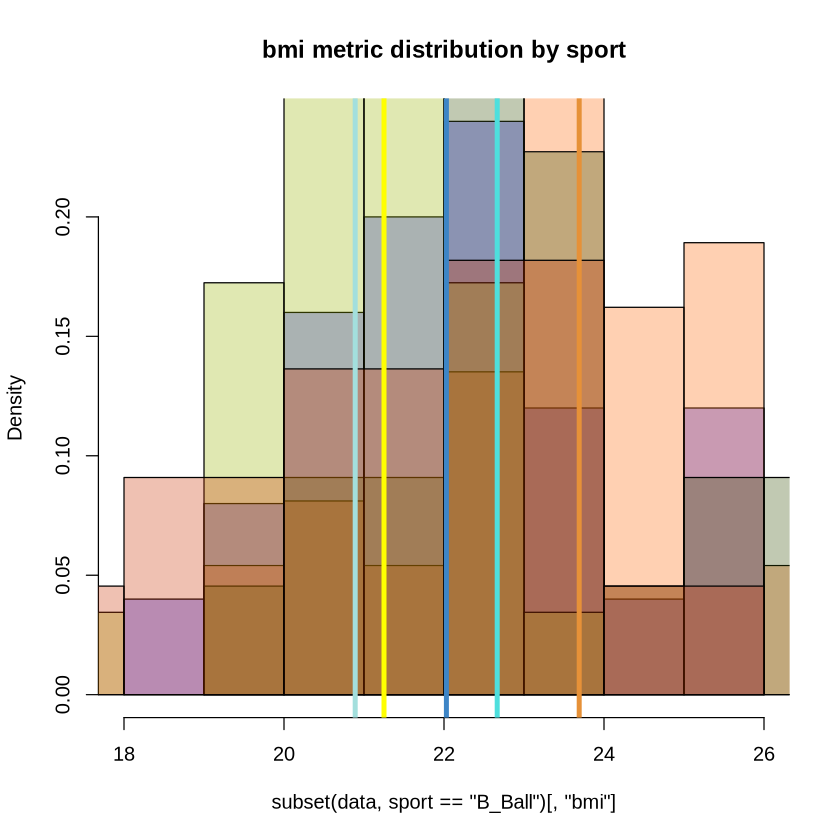

In [98]:
options(
  repr.plot.width = 7,  
  repr.plot.height = 7  
)

hist(subset(data,sport=='B_Ball')[,'bmi'],
    col = rgb(0,0,1,0.3),
    main = 'bmi metric distribution by sport',
    freq = F)
hist(subset(data,sport=='Row')[,'bmi'],
    col = rgb(1,0.4,0,0.3),
    add = T,
    freq = F)
hist(subset(data,sport=='Swim')[,'bmi'],
    col = rgb(0.2,0.3,0,0.3),
    add = T,
    freq = F)
hist(subset(data,sport=='T_400m')[,'bmi'],
    col = rgb(0.6,0.7,0,0.3),
    add = T,
    freq = F)
hist(subset(data,sport=='Tennis')[,'bmi'],
    col = rgb(0.8,0.2,0,0.3),
    add = T,
    freq = F)

# Mediana 'FL' x species
abline(v = median(subset(data, sport=='B_Ball')[,'bmi']), col = '#3d85c6', lwd = 4)
abline(v = median(subset(data, sport=='Row')[,'bmi']), col = '#e69138', lwd = 4)
abline(v = median(subset(data, sport=='Swim')[,'bmi']), col = '#4edfdd', lwd = 4)
abline(v = median(subset(data, sport=='T_400m')[,'bmi']), col = '#a3dfdd', lwd = 4)
abline(v = median(subset(data, sport=='Tennis')[,'bmi']), col = '#FFFF00', lwd = 4)

legend(x = "topright", fill = c('#3d85c6', '#e69138'))

En estos últimos dos gráficos podemos apreciar como las distribuciones de los 5 deportes respecto a las dos variables escogidas son bastante parecidas, con ligeros cambios en las medias de estas, sobretodo en el caso de la variable del indice de masa corporal, lo cual podria indicar que estas categorias influyen en la variable.

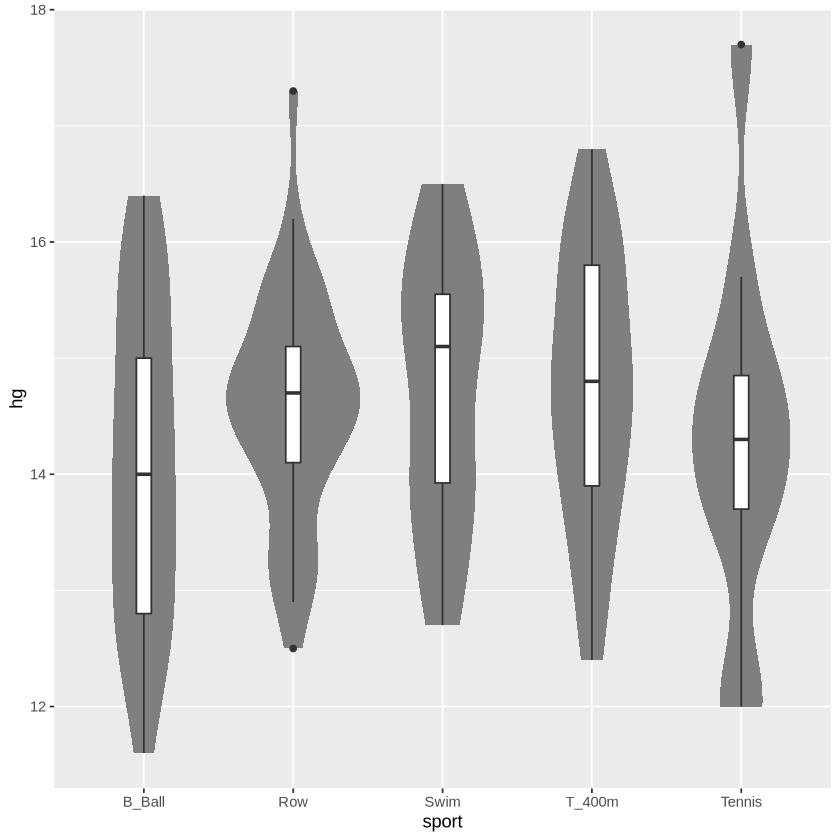

In [77]:
ggplot(data, aes(sport, hg)) +
  geom_violin(color = NA,aes(fill = factor(sport))) +
  theme(legend.position = 'none') +
  geom_boxplot(width = 0.1) +
  scale_fill_manual(values = c('B' = '#3d85c6', 'O' = '#e69138'))

En este boxplot observamos como el deporte no marca un cambio notable en la distribucion de la variable hg lo cual probablemente indique que acabemos obteniendo como resultado que el deporte no sea altamente explicativo de esta variable.

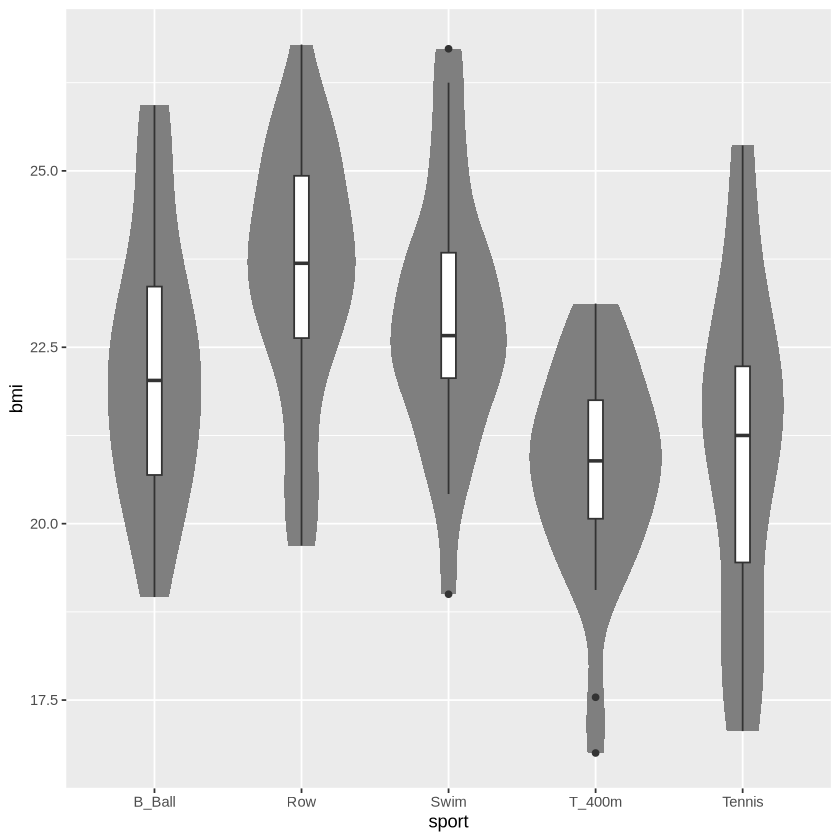

In [78]:
ggplot(data, aes(sport, bmi)) +
  geom_violin(color = NA,aes(fill = factor(sport))) +
  theme(legend.position = 'none') +
  geom_boxplot(width = 0.1) +
  scale_fill_manual(values = c('B' = '#3d85c6', 'O' = '#e69138'))

En este boxplot observamos algo distinto y es que sobretodo en el deporte T_400m se puede apreciar un cambio notable en cuanto a la distribucion de la variable bmi.

Las Hipotesis son las siguientes:

H0: No existen diferencias significativas entre las medias de los grupos.

H1: Existen diferencian significativas entre las medias de los grupos.

In [95]:
anova = aov(hg ~ sport, data = data)
summary(anova)

             Df Sum Sq Mean Sq F value Pr(>F)
sport         4    7.2   1.799   1.258  0.291
Residuals   119  170.2   1.431               

P-valor mayor a 0,05 asi que aceptamos hipotesis nula, asi que tal y como sospechaba, la variable no genera diferencias significativas entre las categorias

In [82]:
anova = aov(bmi ~ sport, data = data)
summary(anova)

             Df Sum Sq Mean Sq F value   Pr(>F)    
sport         4  148.1   37.03   11.04 1.19e-07 ***
Residuals   119  398.9    3.35                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

P-valor muy pequeño, rechazamos hipotesis nula. . Esto sugiere que al menos una categoría deportiva tiene un promedio de BMI significativamente diferente de las demás.

In [11]:
resultados_anova = data.frame(Variable = character(), F_Value = numeric(), P_Value = numeric(), row.names = NULL)
variables = c('rcc', 'wcc', 'hc', 'hg', 'bmi')
for (variable in variables) {
  formula = as.formula(paste(variable, '~ sport'))
  anova_result = aov(formula, data = data)
  
  # Extraer F value y p-value
  f_value = summary(anova_result)[[1]][['F value']][1]
  p_value = summary(anova_result)[[1]][['Pr(>F)']][1]
 resultados_anova = rbind(resultados_anova, data.frame(Variable = variable, F_Value = f_value, P_Value = p_value))
}

# Muestra los resultados de ANOVA
print(resultados_anova)

  Variable    F_Value      P_Value
1      rcc  0.6866758 6.025530e-01
2      wcc  1.2403660 2.975691e-01
3       hc  1.4525845 2.210388e-01
4       hg  1.2575485 2.906102e-01
5      bmi 11.0450579 1.187294e-07


Aqui realizo la prueba para todas las variables por curiosidad y se puede ver como la única variable en la que rechazamos la hipotesis nula es en el indice de masa corporal (bmi).

### ANOVA two-way

In [84]:
data2 = data[, c('sport','sex','rcc', 'wcc', 'hc', 'hg', 'bmi')]
head(data2)

sport  sex rcc  wcc hc   hg   bmi  
1 B_Ball f   3.96 7.5 37.5 12.3 20.56
2 B_Ball f   4.41 8.3 38.2 12.7 20.67
3 B_Ball f   4.14 5.0 36.4 11.6 21.86
4 B_Ball f   4.11 5.3 37.3 12.6 21.88
5 B_Ball f   4.45 6.8 41.5 14.0 18.96
6 B_Ball f   4.10 4.4 37.4 12.5 21.04

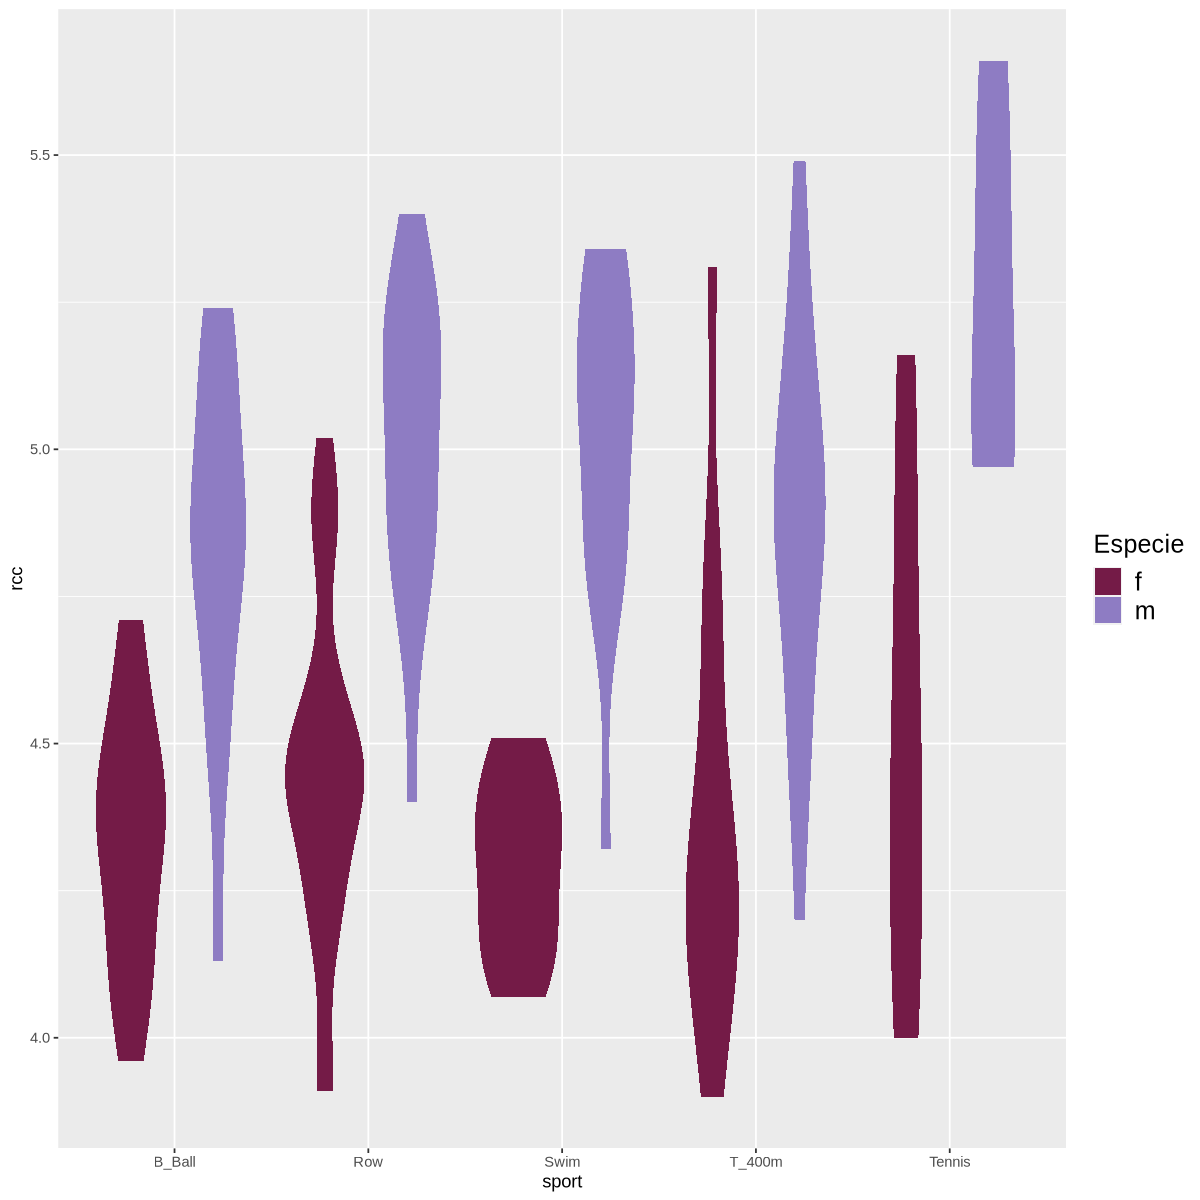

In [87]:
options(
  repr.plot.width = 10,  
  repr.plot.height = 10  
)
ggplot(data2, aes(sport, rcc, fill = factor(sex))) +
  geom_violin(color = NA) +
  theme(legend.position = 'right'
        ,legend.text = element_text(size = 15)
        ,legend.title = element_text(size = 15)) +
  scale_fill_manual(values = c('f' = '#741b47', 'm' = '#8e7cc3')) +
  labs(fill = 'Especie')

Con este grafico de violin podemos apreciar fácilmente que a primera vista, parece haber una relacion entre el sexo y la distribucion de la variable rcc, y no solo en una de las categorias de deportes, sino en todas ellas.

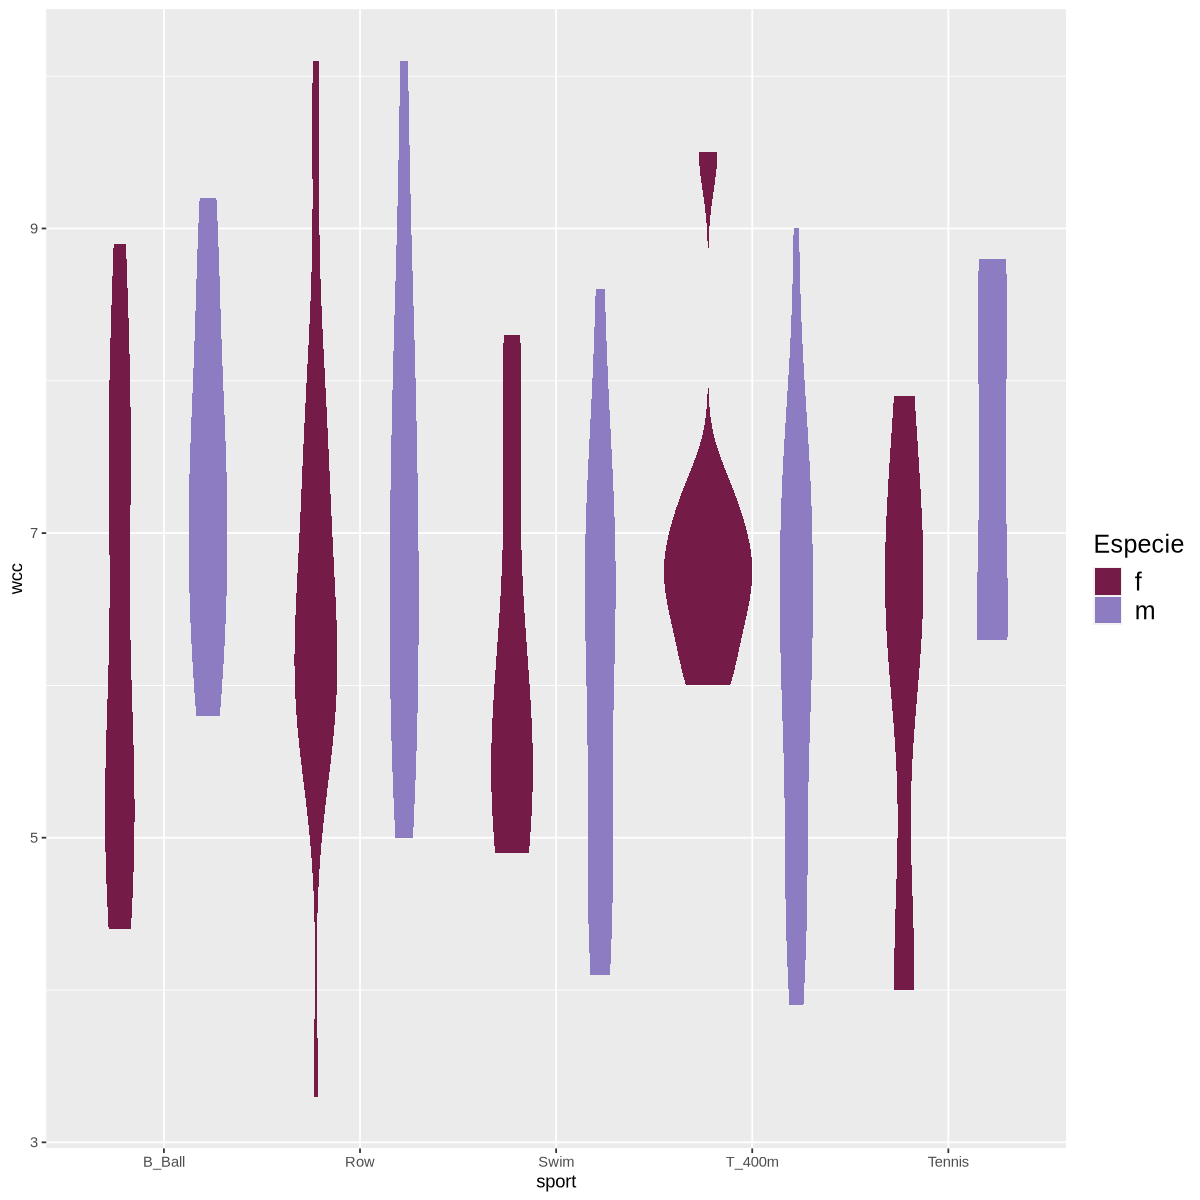

In [88]:
options(
  repr.plot.width = 10,  
  repr.plot.height = 10  
)
ggplot(data2, aes(sport, wcc, fill = factor(sex))) +
  geom_violin(color = NA) +
  theme(legend.position = 'right'
        ,legend.text = element_text(size = 15)
        ,legend.title = element_text(size = 15)) +
  scale_fill_manual(values = c('f' = '#741b47', 'm' = '#8e7cc3')) +
  labs(fill = 'Especie')

A diferencia de la variable rcc, con la variable wcc vemos que no parece haber una diferencia notable a través del sexo en niguno de los deportes.

In [89]:
anova = aov(rcc ~ sport * sex, data = data)
summary(anova)

             Df Sum Sq Mean Sq F value Pr(>F)    
sport         4  0.466   0.116   1.279  0.282    
sex           1  9.502   9.502 104.457 <2e-16 ***
sport:sex     4  0.297   0.074   0.815  0.518    
Residuals   114 10.370   0.091                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Observamos como para la variable rcc aceptamos hipotesis nula para la variable categorica sports pero la rechazamos para la variable sexo, y es que tal y como hemos visto en los gráficos previos, la variable sex se presentaba de forma interesante al marcar una clara diferencia en las distribuciones.

In [9]:
anova = aov(wcc ~ sport * sex, data = data)
summary(anova)

             Df Sum Sq Mean Sq F value Pr(>F)
sport         4   9.45   2.363   1.278  0.283
sex           1   1.64   1.643   0.889  0.348
sport:sex     4  14.34   3.584   1.939  0.109
Residuals   114 210.75   1.849               

En el caso de la variable wcc, aceptamos la hipotesis nula en todos los casos, es decir, ninguna de las categorias de las variables categoricas  genera una respuesta notable en nuestra variable continua.

In [10]:
resultados_anova_conjunto = data.frame(Variable = character(), F_Value = numeric(), P_Value = numeric(), row.names = NULL)
resultados_anova_sp = data.frame(Variable = character(), F_Value = numeric(), P_Value = numeric(), row.names = NULL)
resultados_anova_sex = data.frame(Variable = character(), F_Value = numeric(), P_Value = numeric(), row.names = NULL)
variables = c('rcc', 'wcc', 'hc', 'hg', 'bmi')
for (variable in variables) {
  formula = as.formula(paste(variable, '~ sport * sex'))
  anova_result = aov(formula, data = data)
  
  # Extraer F value y p-value
  f_value3 = summary(anova_result)[[1]][['F value']][3]
  p_value3 = summary(anova_result)[[1]][['Pr(>F)']][3]
  resultados_anova_conjunto = rbind(resultados_anova_conjunto, data.frame(Variable = variable, F_Value = f_value3, P_Value = p_value3))
  f_value1 = summary(anova_result)[[1]][['F value']][1]
  p_value1 = summary(anova_result)[[1]][['Pr(>F)']][1]
  resultados_anova_sp = rbind(resultados_anova_sp, data.frame(Variable = variable, F_Value = f_value1, P_Value = p_value1))
  f_value2 = summary(anova_result)[[1]][['F value']][2]
  p_value2 = summary(anova_result)[[1]][['Pr(>F)']][2]
  resultados_anova_sex = rbind(resultados_anova_sex, data.frame(Variable = variable, F_Value = f_value2, P_Value = p_value2))
}

# Muestra los resultados de ANOVA
print('Resultados impacto de Sport & Sex conjuntamente sobre las variables')
print(resultados_anova_conjunto)
print('Resultados impacto de Sport sobre las variables')
print(resultados_anova_sp)
print('Resultados impacto de Sex sobre las variables')
print(resultados_anova_sex)

[1] "Resultados impacto de Sport & Sex conjuntamente sobre las variables"
  Variable   F_Value   P_Value
1      rcc 0.8151836 0.5180164
2      wcc 1.9386345 0.1087763
3       hc 0.7648780 0.5502423
4       hg 0.9199158 0.4549883
5      bmi 0.1531962 0.9612150
[1] "Resultados impacto de Sport sobre las variables"
  Variable   F_Value      P_Value
1      rcc  1.279395 2.822458e-01
2      wcc  1.278340 2.826579e-01
3       hc  2.696782 3.425760e-02
4       hg  2.529049 4.436928e-02
5      bmi 13.482862 4.974334e-09
[1] "Resultados impacto de Sex sobre las variables"
  Variable     F_Value      P_Value
1      rcc 104.4567854 8.481931e-18
2      wcc   0.8887089 3.478210e-01
3       hc 103.8688232 9.904415e-18
4       hg 121.6406251 1.091431e-19
5      bmi  30.6522348 2.002355e-07


Aqui una vez mas realizo la prueba para todas las variables y tal y como vemos la fusión de ambas variables categoricas no tiene una influencia suficiente en ninguna de las variables continuas, sin embargo, la variable sport por si sola la tiene para el indice de masa corporal y en menor medida para las variables hc y hg, y la variable sex tiene una influencia muy notable en todas las variables excepto en aquella que he escogido para hacer el analisis, las células blancas en la sangre (wcc).

### Conclusiones

Gracias a este analisis hemos visto que la variable categorica sport no tenia una gran influencia en la mayoria de varibles a excepcion de la variable de indice de masa corporal donde se podia apreciar una fuerte influencia. Otro dato interesante acerca de la variable de deportes, es que según la prueba de one-way anova aceptariamos la hipotseis nula para las variables hg y hc, sin embargo en la prueba two-way de anova, la rechazamos. Esto presenta una duda importante respecto a sí deberiamos considerar que estas variables son afectadas o no por las categorias de sport. Por otro lado, con la variable 